In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Input
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

import scipy.io as sio

In [ ]:
tf.test.gpu_device_name()

''

In [ ]:
from google.colab import files
uploaded = files.upload()

# from google.colab import drive

# drive.mount('/content')

Saving Label.csv to Label.csv
Saving RSS_LOS.csv to RSS_LOS.csv
Saving RSS_total.csv to RSS_total.csv


In [ ]:
import io
X = pd.read_csv(io.BytesIO(uploaded['RSS_total.csv']))
Y = pd.read_csv(io.BytesIO(uploaded['Label.csv']))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [ ]:
print("- Training-set:\t\t{}".format(x_train.shape[0]))
print("- Test-set:\t\t{}".format(x_test.shape[0]))
print(" Shape of train target set:{}".format(y_train.shape))
print(" Shape of test target set:{}".format(y_test.shape))

- Training-set:		90000
- Test-set:		10000
 Shape of train target set:(90000, 6)
 Shape of test target set:(10000, 6)


In [ ]:
scalerX = StandardScaler().fit(x_train)
x_train = scalerX.transform(x_train)
x_test = scalerX.transform(x_test)
scalerY = StandardScaler().fit(y_train)
y_train = scalerY.transform(y_train)

In [ ]:
dim_in = x_train.shape[1]
dim_out = y_train.shape[1]
state_bias = True
n_neurons = 128 
p_dropout = 0.2
activation_1 = 'relu'
activation_2 = 'linear'

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(dim_in)))

model.add(Dense(n_neurons, use_bias=state_bias, activation=activation_1))
model.add(BatchNormalization())
model.add(Dropout(p_dropout))

model.add(Dense(n_neurons, use_bias=state_bias, activation=activation_1))
model.add(BatchNormalization())
model.add(Dropout(p_dropout))

model.add(Dense(n_neurons, use_bias=state_bias, activation=activation_1))
model.add(BatchNormalization())
model.add(Dropout(p_dropout))

model.add(Dense(n_neurons, use_bias=state_bias, activation=activation_1))
model.add(BatchNormalization())
model.add(Dropout(p_dropout))

model.add(Dense(dim_out, use_bias=state_bias, activation=activation_2))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_16 (Batc (None, 16)                64        
_________________________________________________________________
dense_17 (Dense)             (None, 128)               2176      
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 128)               512       
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 128)              

In [ ]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=optimizer, loss='mse',  metrics=['mae', 'mse'])

In [ ]:
%%time
history = model.fit(x=x_train, y=y_train, epochs=30, batch_size=128, validation_split=0.25,verbose=1)

Epoch 1/30
528/528 [==============================] - 13s 25ms/step - loss: 1.1213 - mae: 0.8534 - mse: 1.1213 - val_loss: 0.9813 - val_mae: 0.8031 - val_mse: 0.9813
Epoch 2/30
528/528 [==============================] - 12s 23ms/step - loss: 0.9423 - mae: 0.7745 - mse: 0.9423 - val_loss: 0.8655 - val_mae: 0.7286 - val_mse: 0.8655
Epoch 3/30
528/528 [==============================] - 12s 23ms/step - loss: 0.8584 - mae: 0.7235 - mse: 0.8584 - val_loss: 0.7450 - val_mae: 0.6599 - val_mse: 0.7450
Epoch 4/30
528/528 [==============================] - 12s 23ms/step - loss: 0.7919 - mae: 0.6849 - mse: 0.7919 - val_loss: 0.7144 - val_mae: 0.6392 - val_mse: 0.7144
Epoch 5/30
528/528 [==============================] - 12s 23ms/step - loss: 0.7589 - mae: 0.6649 - mse: 0.7589 - val_loss: 0.6975 - val_mae: 0.6264 - val_mse: 0.6975
Epoch 6/30
528/528 [==============================] - 12s 23ms/step - loss: 0.7388 - mae: 0.6525 - mse: 0.7388 - val_loss: 0.6774 - val_mae: 0.6109 - val_mse: 0.6774
Epoc

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,1.121282,0.853370,1.121282,0.981333,0.803132,0.981333,0
1,0.942286,0.774519,0.942286,0.865475,0.728605,0.865475,1
2,0.858403,0.723505,0.858403,0.745041,0.659932,0.745041,2
3,0.791887,0.684911,0.791887,0.714369,0.639237,0.714369,3
4,0.758874,0.664857,0.758874,0.697513,0.626409,0.697513,4
5,0.738775,0.652546,0.738775,0.677444,0.610875,0.677444,5
6,0.724023,0.643119,0.724023,0.674714,0.609144,0.674714,6
7,0.711940,0.635292,0.711940,0.662316,0.603898,0.662316,7
8,0.699498,0.627515,0.699498,0.643312,0.589353,0.643312,8
9,0.684079,0.617901,0.684079,0.609375,0.567672,0.609375,9


In [ ]:
hist.to_csv('hist_total.csv', index=False)

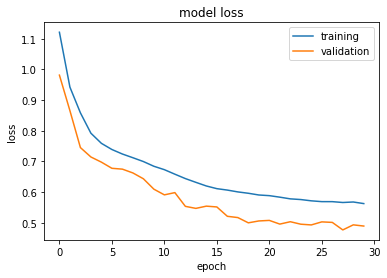

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.legend(['training','validation'])
plt.xlabel('epoch')
plt.show()
%matplotlib inline

In [ ]:
%%time
y_predict = model.predict(x_test)

CPU times: user 927 ms, sys: 30.9 ms, total: 958 ms
Wall time: 832 ms


In [ ]:
y_predict = scalerY.inverse_transform(y_predict)

In [ ]:
y_test = pd.DataFrame(y_test)
y_test.to_csv('y_test_total.csv', index=False)
y_predict = pd.DataFrame(y_predict)
y_predict.to_csv('y_predict_total.csv', index=False)